In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [5]:
# LOAD DATA
# Import necessary libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Ignore warnings to keep the notebook clean
warnings.filterwarnings("ignore")

# Set visualization styles
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

data_path = 'usa_rain_prediction_dataset_2024_2025.csv'
rain_data = pd.read_csv(data_path)
print(rain_data.head())

         Date  Location  Temperature   Humidity  Wind Speed  Precipitation  \
0  2024-01-01  New York    87.524795  75.655455   28.379506       0.000000   
1  2024-01-02  New York    83.259325  28.712617   12.436433       0.526995   
2  2024-01-03  New York    80.943050  64.740043   14.184831       0.916884   
3  2024-01-04  New York    78.097552  59.738984   19.444029       0.094134   
4  2024-01-05  New York    37.059963  34.766784    3.689661       1.361272   

   Cloud Cover     Pressure  Rain Tomorrow  
0    69.617966  1026.030278              0  
1    41.606048   995.962065              0  
2    77.364763   980.796739              1  
3    52.541196   979.012163              0  
4    85.584000  1031.790859              0  


In [6]:
#DATA CLEANING
# Check for missing values
print("Missing Values in each column:\n", rain_data.isnull().sum())

# Separate numeric and categorical columns
numeric_cols = rain_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = rain_data.select_dtypes(include=['object']).columns

# Fill missing values: mean for numeric, mode for categorical
rain_data[numeric_cols] = rain_data[numeric_cols].fillna(rain_data[numeric_cols].mean())
for col in categorical_cols:
    rain_data[col].fillna(rain_data[col].mode()[0], inplace=True)

# Verify there are no missing values
print("Missing values after cleaning:\n", rain_data.isnull().sum())


Missing Values in each column:
 Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64
Missing values after cleaning:
 Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64


In [7]:
# DATA PREPROCESSING - HANDLING OUTLIERS
import numpy as np

def handle_outliers(df, column):
    upper_limit = df[column].mean() + 3 * df[column].std()
    lower_limit = df[column].mean() - 3 * df[column].std()
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    return df

# Handle outliers in relevant numeric columns (assuming columns like 'Temperature', 'Humidity', etc.)
for col in numeric_cols:
    rain_data = handle_outliers(rain_data, col)

# Check data summary after outlier handling
print(rain_data.describe())


        Temperature      Humidity    Wind Speed  Precipitation   Cloud Cover  \
count  73100.000000  73100.000000  73100.000000   73100.000000  73100.000000   
mean      65.182270     59.875041     15.017946       0.388252     54.942807   
std       20.205793     23.066115      8.668729       0.466500     25.982487   
min       30.000766     20.000272      0.000712       0.000000     10.000856   
25%       47.678968     39.800732      7.485182       0.000000     32.318668   
50%       65.294949     59.887840     15.102495       0.196909     55.011121   
75%       82.636570     79.835990     22.551794       0.673177     77.412469   
max       99.997393     99.999025     29.999017       1.815134     99.998957   

           Pressure  Rain Tomorrow  
count  73100.000000   73100.000000  
mean    1005.176013       0.220410  
std       20.203889       0.414526  
min      970.000919       0.000000  
25%      987.697646       0.000000  
50%     1005.284188       0.000000  
75%     1022.727410 

In [8]:
#ENCODING CATEGORICAL VARIABLES
# Perform one-hot encoding on categorical columns (like 'Location' if applicable)
rain_data = pd.get_dummies(rain_data, columns=categorical_cols, drop_first=True)


In [9]:
#FEATURE AND TARGET SEPARATION
# Separate features and target
X = rain_data.drop("Rain Tomorrow", axis=1)
y = rain_data["Rain Tomorrow"]


In [10]:
# NORMALIZATION
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


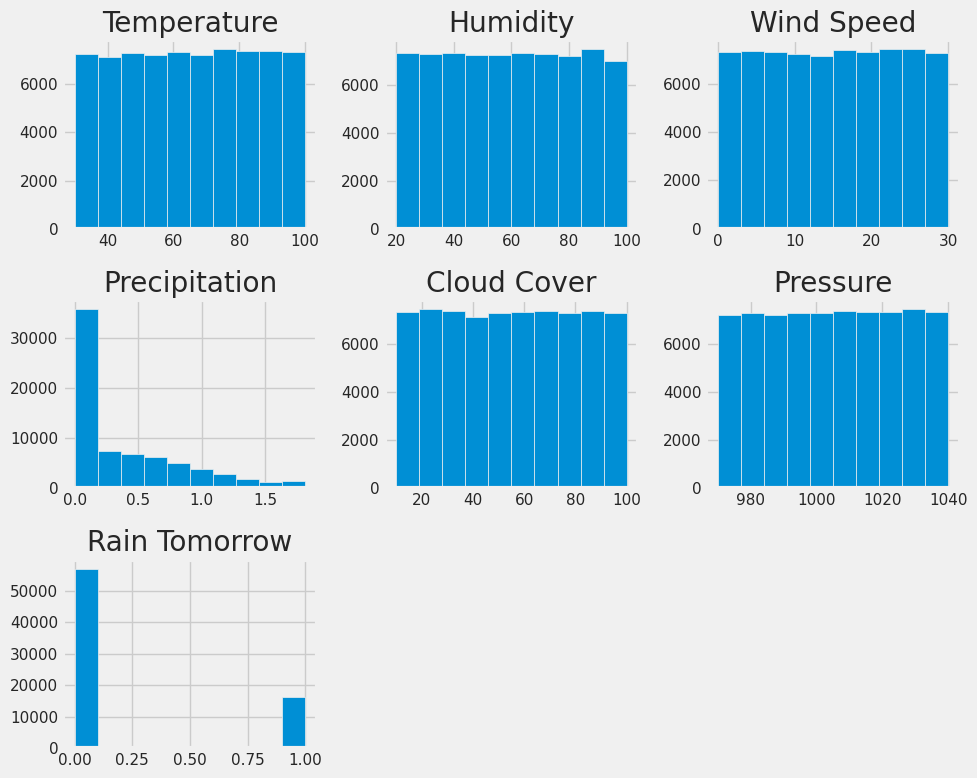

In [11]:
# DATA VISUALIZATION
import matplotlib.pyplot as plt

# Plot histograms for each feature
rain_data.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

# Use the correct target column name from your dataset
X = rain_data.drop("Rain Tomorrow", axis=1)  # Update this column name if needed
y = rain_data["Rain Tomorrow"]  # Update this column name if needed

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression Accuracy: 0.9058139534883721
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     11369
         1.0       0.84      0.71      0.77      3251

    accuracy                           0.91     14620
   macro avg       0.88      0.84      0.86     14620
weighted avg       0.90      0.91      0.90     14620



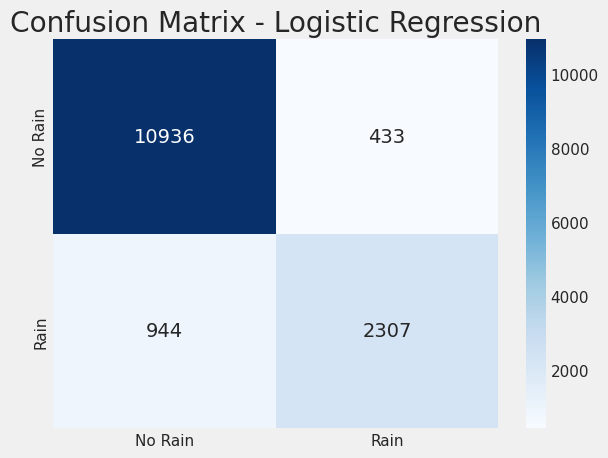

In [13]:
#MODEL TRAINING AND EVALUATION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


KNN Accuracy: 0.7602599179206566
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85     11369
         1.0       0.45      0.36      0.40      3251

    accuracy                           0.76     14620
   macro avg       0.64      0.62      0.63     14620
weighted avg       0.74      0.76      0.75     14620



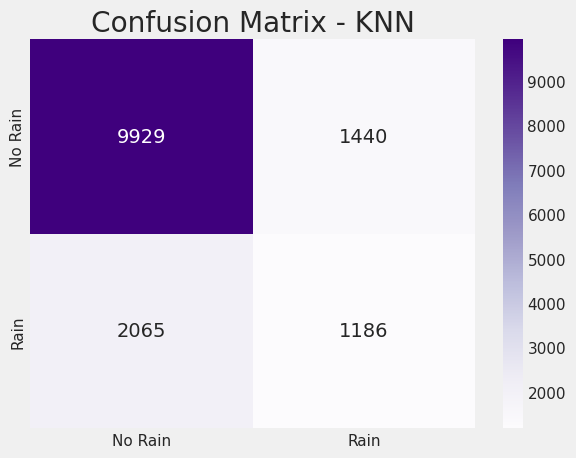

In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix - KNN')
plt.show()


Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11369
         1.0       1.00      1.00      1.00      3251

    accuracy                           1.00     14620
   macro avg       1.00      1.00      1.00     14620
weighted avg       1.00      1.00      1.00     14620



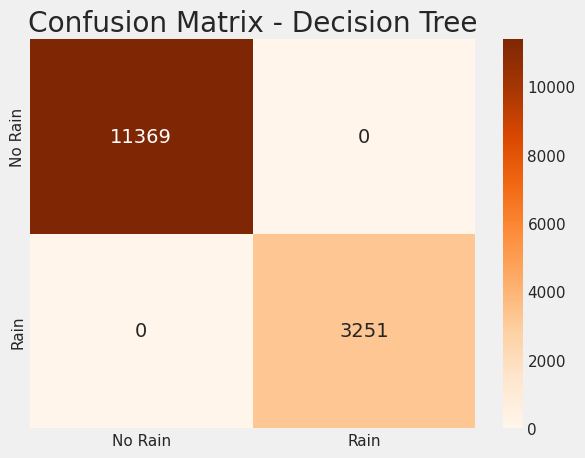

In [15]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix - Decision Tree')
plt.show()


Perceptron Accuracy: 0.83187414500684
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     11369
         1.0       0.59      0.77      0.67      3251

    accuracy                           0.83     14620
   macro avg       0.76      0.81      0.78     14620
weighted avg       0.85      0.83      0.84     14620



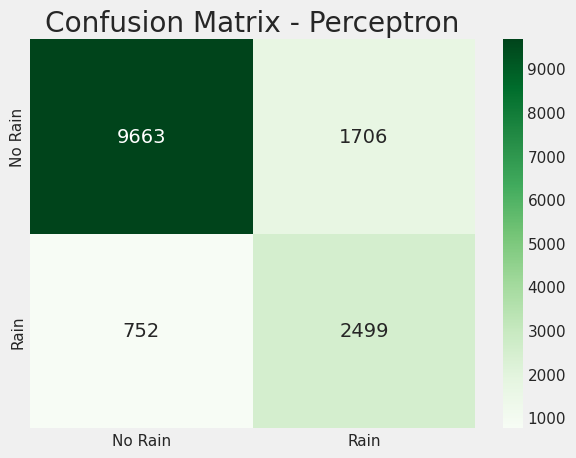

In [16]:
# PERCEPTRON
from sklearn.linear_model import Perceptron

# Perceptron Model
perceptron_model = Perceptron(random_state=42)
perceptron_model.fit(X_train, y_train)
y_pred_perceptron = perceptron_model.predict(X_test)

# Evaluation
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_perceptron))
print(classification_report(y_test, y_pred_perceptron))

# Confusion Matrix
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)
sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Greens', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix - Perceptron')
plt.show()


In [ ]:
# K fold cross validation
from sklearn.model_selection import cross_val_score

# Cross-validation scores for each model
log_cv = cross_val_score(log_model, X_scaled, y, cv=5).mean()
knn_cv = cross_val_score(knn_model, X_scaled, y, cv=5).mean()
tree_cv = cross_val_score(decision_tree_model, X_scaled, y, cv=5).mean()
perceptron_cv = cross_val_score(perceptron_model, X_scaled, y, cv=5).mean()


In [ ]:
# Create a DataFrame to compare the models
cv_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Perceptron'],
    'Cross-Validation Accuracy': [log_cv, knn_cv, tree_cv, perceptron_cv]
})
print(cv_results)

# Plot the comparison
plt.figure(figsize=(8, 6))
plt.bar(cv_results['Model'], cv_results['Cross-Validation Accuracy'], color=['blue', 'purple', 'orange', 'green'])
plt.title('Model Comparison (Cross-Validation Accuracy)')
plt.ylabel('Accuracy')
plt.show()
